<a href="https://colab.research.google.com/github/aesnin12/DATA103Project/blob/main/DATA103_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data103

1. On the assumption na alcohol does impact grades, what combination of features would result in worse and best results
2. We want to know yung diff processes each algo does, how they place importance on a feature, qnd yung learning pattern nta

In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.feature_selection import f_classif
    # from google.colab import drive
    # from google.colab import files


In [2]:
d1 = pd.read_csv("student-mat.csv", sep=",")
d2 = pd.read_csv("student-por.csv", sep=",")

merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus",
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

d3 = pd.merge(d1, d2, on=merge_columns, suffixes=('_mat', '_por'))
print(len(d3))
print(d3)

382
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
378     MS   F   18       U     GT3       T     1     1     other     other   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel_por freetime_por  goout_por  Da

In [3]:
d3['G3'] = d3[['G3_mat', 'G3_por']].mean(axis=1).round()
d3['pass'] = d3['G3'].apply(lambda x: 1 if x >= 11 else 0)

# print(d3.isnull().sum())

features = ['Dalc_mat', 'Walc_mat', 'absences_mat', 'studytime_mat', 'goout_mat', 'higher_mat', 'famsup_mat']
df = d3[features + ['pass']].copy()
df['higher_mat'] = df['higher_mat'].map({'yes': 1, 'no': 0})
df['famsup_mat'] = df['famsup_mat'].map({'yes': 1, 'no': 0})

print(df.isnull().sum())

Dalc_mat         0
Walc_mat         0
absences_mat     0
studytime_mat    0
goout_mat        0
higher_mat       0
famsup_mat       0
pass             0
dtype: int64


higher_mat
higher_mat
1    364
0     18
Name: count, dtype: int64

famsup_mat
famsup_mat
1    238
0    144
Name: count, dtype: int64



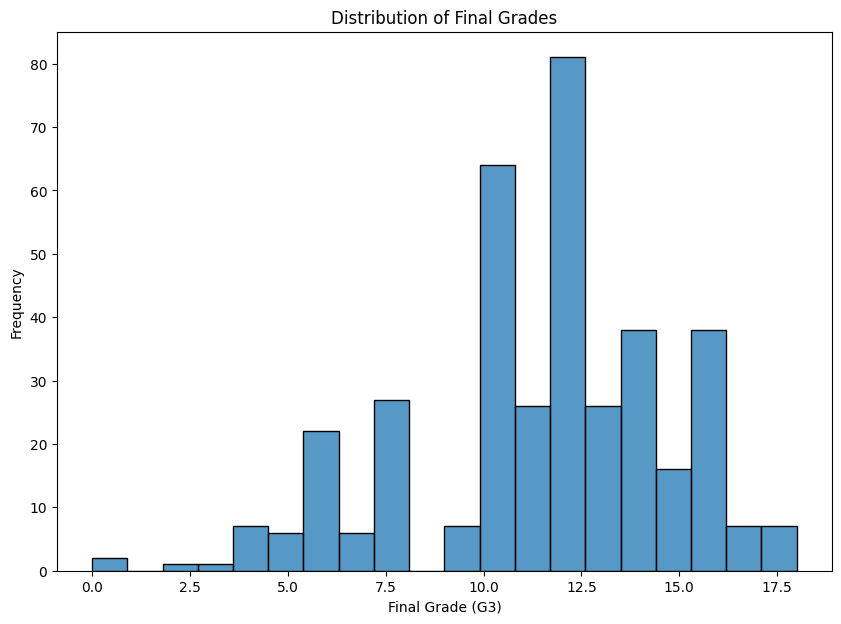

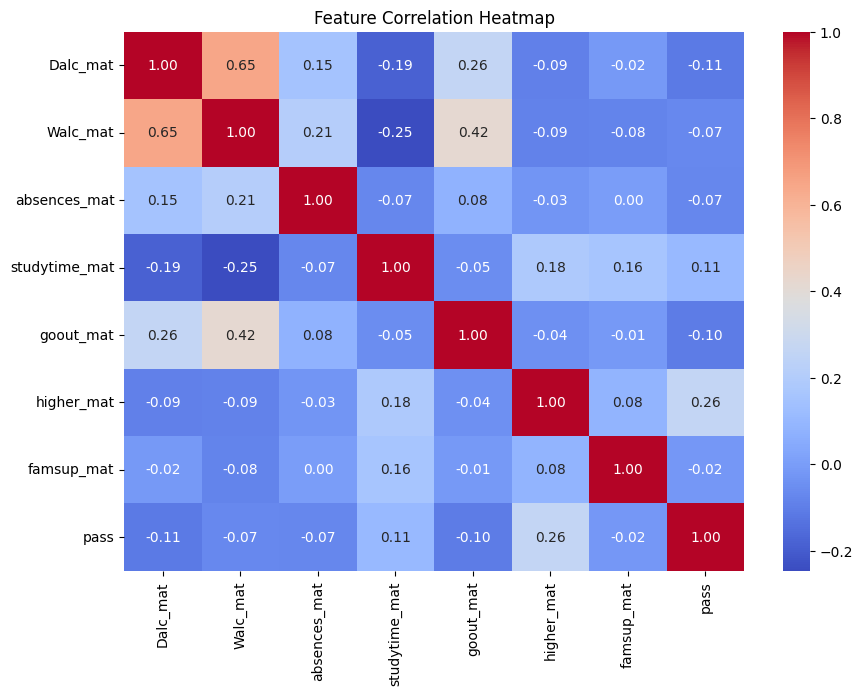

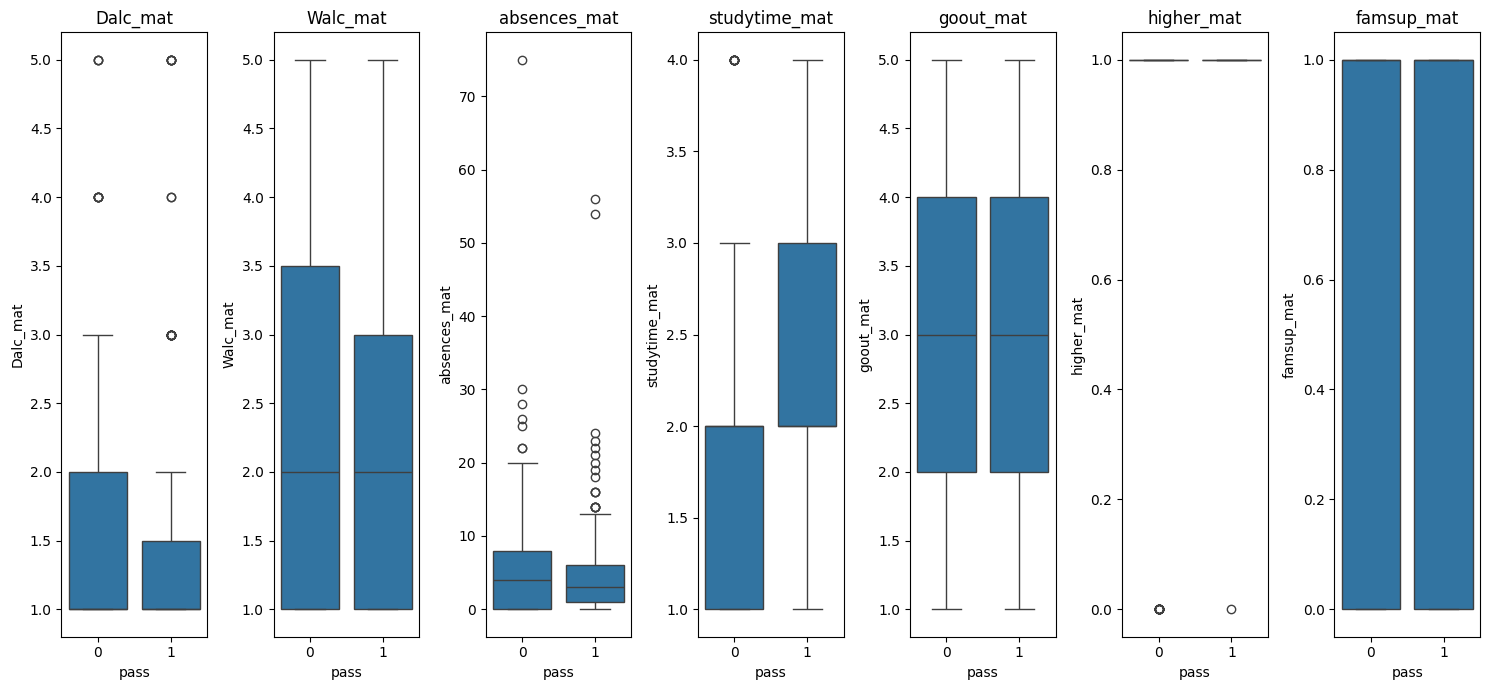

In [4]:
X = df.drop('pass', axis=1)
y = df['pass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for col in ['higher_mat', 'famsup_mat']:
    print(col)
    print(df[col].value_counts())
    print()
# Exploratory Data Analysis
plt.figure(figsize=(10, 7))
sns.histplot(d3['G3'], bins=20)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot of features by pass/fail
plt.figure(figsize=(15, 7))
for idx, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), idx + 1)
    sns.boxplot(x='pass', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()
# based on graph below higher_mat and famsup_mat are not good predictors


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.34      0.50        29
           1       0.71      0.98      0.82        48

    accuracy                           0.74        77
   macro avg       0.81      0.66      0.66        77
weighted avg       0.79      0.74      0.70        77



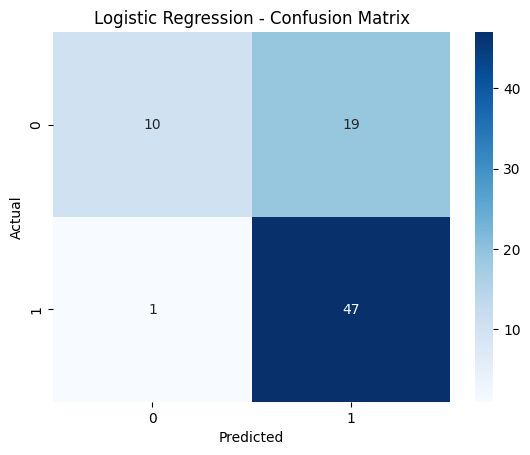

In [ ]:
print("\nLogistic Regression")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest
              precision    recall  f1-score   support

           0       0.68      0.45      0.54        29
           1       0.72      0.88      0.79        48

    accuracy                           0.71        77
   macro avg       0.70      0.66      0.67        77
weighted avg       0.71      0.71      0.70        77



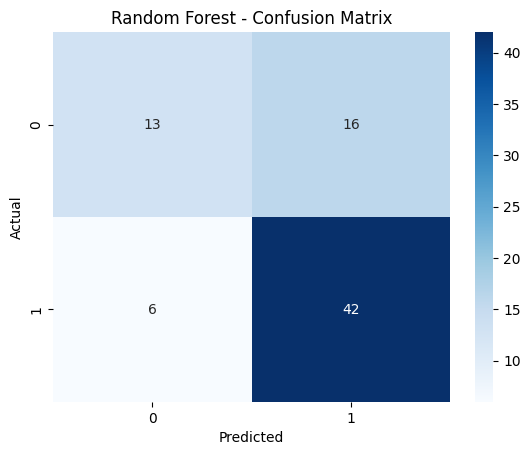

In [8]:
print("\nRandom Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.80      0.41      0.55        29
           1       0.73      0.94      0.82        48

    accuracy                           0.74        77
   macro avg       0.76      0.68      0.68        77
weighted avg       0.75      0.74      0.72        77



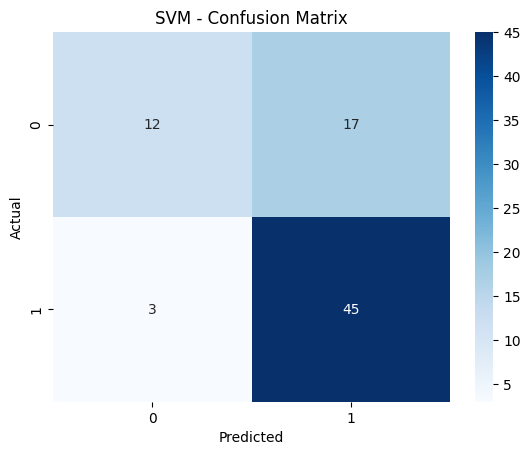

In [9]:
print("\nSupport Vector Machine (SVM)")
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Multivariate Analysis 
print("\n ANOVA F-test")
f_stat, p_val = f_classif(X, y)
for i, col in enumerate(X.columns):
    print(f"{col}: F={f_stat[i]:.2f}, p={p_val[i]:.4f}")

# Logistic Regression Coefficients
lr = LogisticRegression()
lr.fit(X_scaled, y)
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
px.bar(importance_df, x='Feature', y='Importance', title='Random Forest Feature Importance').show()


--- ANOVA F-test ---
Dalc_mat: F=4.78, p=0.0293
Walc_mat: F=1.73, p=0.1892
absences_mat: F=1.98, p=0.1603
studytime_mat: F=4.49, p=0.0348
goout_mat: F=4.22, p=0.0406
higher_mat: F=28.00, p=0.0000
famsup_mat: F=0.17, p=0.6786

Logistic Regression Coefficients:
Dalc_mat: -0.2068
Walc_mat: 0.1735
absences_mat: -0.1273
studytime_mat: 0.1370
goout_mat: -0.2039
higher_mat: 0.6818
famsup_mat: -0.1024
